In [4]:
#Step 1: Load and Explore the Data
import pandas as pd

# Load the dataset
data = pd.read_csv('Call_Center.csv')

# Display the first few rows and structure of the dataset
print(data.head())
print(data.info())


                         Id Call Timestamp Call-Centres City      Channel  \
0  DKK-57076809-w-055481-fU  10/29/20 0:00       Los Angeles  Call-Center   
1  QGK-72219678-w-102139-KY   10/5/20 0:00         Baltimore      Chatbot   
2  GYJ-30025932-A-023015-LD   10/4/20 0:00       Los Angeles  Call-Center   
3  ZJI-96807559-i-620008-m7  10/17/20 0:00       Los Angeles      Chatbot   
4  DDU-69451719-O-176482-Fm  10/17/20 0:00       Los Angeles  Call-Center   

          City       Customer Name            Reason Response Time  \
0      Detroit    Analise Gairdner  Billing Question    Within SLA   
1  Spartanburg    Crichton Kidsley    Service Outage    Within SLA   
2  Gainesville   Averill Brundrett  Billing Question     Above SLA   
3     Portland     Noreen Lafflina  Billing Question    Within SLA   
4   Fort Wayne  Toma Van der Beken          Payments    Within SLA   

       Sentiment           State  Call Duration In Minutes  Csat Score  
0        Neutral        Michigan           

In [10]:
#Step 2: Data Cleaning and Preprocessing
#Identify missing values, incorrect data types, and handle them appropriately.
# Check for missing values
print(data.isnull().sum())

# Convert timestamp to datetime
data['Call Timestamp'] = pd.to_datetime(data['Call Timestamp'])

# Handle missing values (if any)
# For example, fill missing values in 'csat' with the mean
mean_csat = data['Csat Score'].mean()
data['Csat Score'].fillna(mean_csat, inplace=True)


Id                              0
Call Timestamp                  0
Call-Centres City               0
Channel                         0
City                            0
Customer Name                   0
Reason                          0
Response Time                   0
Sentiment                       0
State                           0
Call Duration In Minutes        0
Csat Score                  20670
dtype: int64


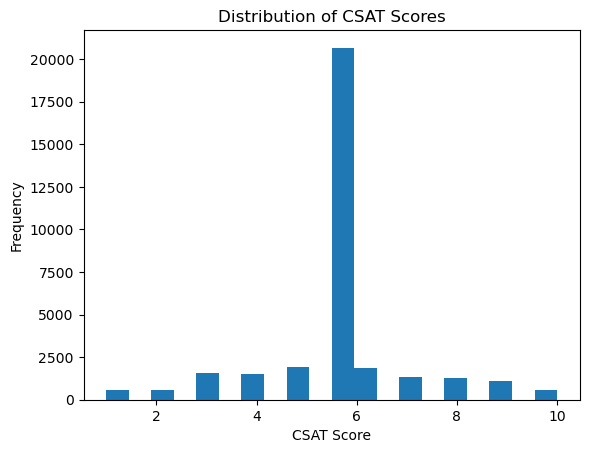

In [12]:
#Step 3: Exploratory Data Analysis and Questions
#Question 1: What is the distribution of CSAT scores?
# Visualize CSAT distribution
import matplotlib.pyplot as plt

plt.hist(data['Csat Score'], bins=20)
plt.xlabel('CSAT Score')
plt.ylabel('Frequency')
plt.title('Distribution of CSAT Scores')
plt.show()


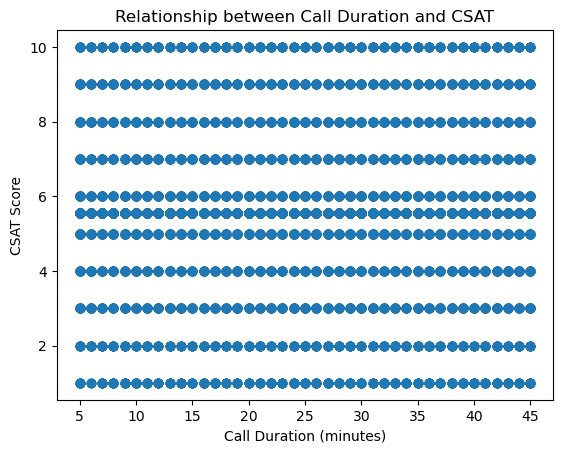

Correlation between Call Duration and CSAT: -0.006094195254705415


In [16]:
#Question 2: Is there a relationship between call duration and customer satisfaction (CSAT)?
# Scatter plot between call duration and CSAT score
plt.scatter(data['Call Duration In Minutes'], data['Csat Score'])
plt.xlabel('Call Duration (minutes)')
plt.ylabel('CSAT Score')
plt.title('Relationship between Call Duration and CSAT')
plt.show()

# Calculate correlation
correlation = data['Call Duration In Minutes'].corr(data['Csat Score'])
print('Correlation between Call Duration and CSAT:', correlation)

Top Reasons for Customer Calls:
Billing Question    23462
Payments             4749
Service Outage       4730
Name: Reason, dtype: int64


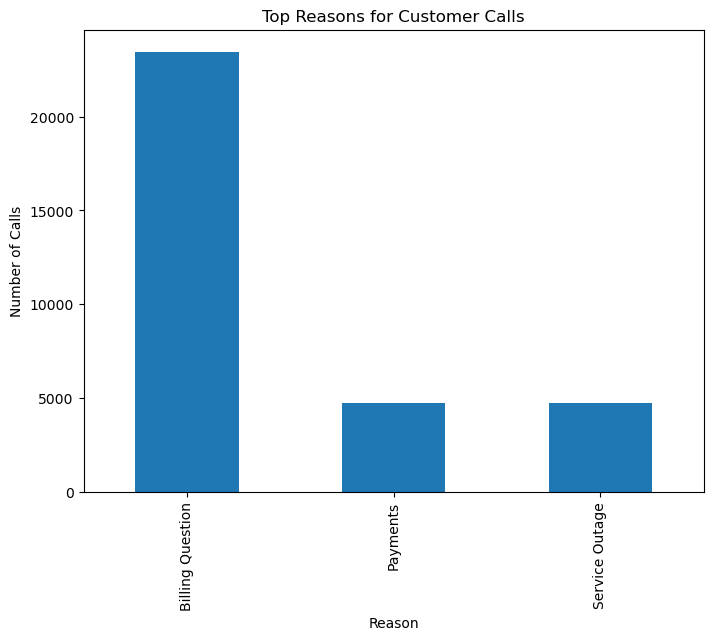

In [24]:
#Question 3: What are the top reasons for customer calls?
# Count and visualize top reasons for calls
top_reasons = data['Reason'].value_counts().head(10)
print('Top Reasons for Customer Calls:')
print(top_reasons)

top_reasons.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Reason')
plt.ylabel('Number of Calls')
plt.title('Top Reasons for Customer Calls')
plt.show()

